In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import yfinance as yf

In [3]:
fb = yf.download('FB', '2015-01-01', '2020-01-01')

[*********************100%***********************]  1 of 1 downloaded


In [4]:
fb.head()

Open   High    Low  Close  Adj Close    Volume
Date                                                       
2014-12-31  79.54  79.80  77.86  78.02      78.02  19935400
2015-01-02  78.58  78.93  77.70  78.45      78.45  18177500
2015-01-05  77.98  79.25  76.86  77.19      77.19  26452200
2015-01-06  77.23  77.59  75.36  76.15      76.15  27399300
2015-01-07  76.76  77.36  75.82  76.15      76.15  22045300

In [5]:
fb['close_next_day'] = fb['Close'].shift(-1, axis=0)

In [6]:
fb.head()

Open   High    Low  Close  Adj Close    Volume  close_next_day
Date                                                                       
2014-12-31  79.54  79.80  77.86  78.02      78.02  19935400           78.45
2015-01-02  78.58  78.93  77.70  78.45      78.45  18177500           77.19
2015-01-05  77.98  79.25  76.86  77.19      77.19  26452200           76.15
2015-01-06  77.23  77.59  75.36  76.15      76.15  27399300           76.15
2015-01-07  76.76  77.36  75.82  76.15      76.15  22045300           78.18

In [7]:
df = fb[['High','Low','close_next_day']]

In [8]:
df.head()

High    Low  close_next_day
Date                                    
2014-12-31  79.80  77.86           78.45
2015-01-02  78.93  77.70           77.19
2015-01-05  79.25  76.86           76.15
2015-01-06  77.59  75.36           76.15
2015-01-07  77.36  75.82           78.18

In [13]:
high = df['High'].to_numpy()
low = df['Low'].to_numpy()
y = df['close_next_day'].to_numpy()

In [14]:
high = np.delete(high,-1)
low = np.delete(low,-1)
y = np.delete(y,-1)

In [15]:
y.shape

(1258,)

In [16]:
y = y.reshape(1258,1)

In [17]:
y

array([[ 78.45],
       [ 77.19],
       [ 76.15],
       ...,
       [208.1 ],
       [204.41],
       [205.25]])

In [21]:
x = np.vstack((high,low)).T

In [22]:
x

array([[ 79.8 ,  77.86],
       [ 78.93,  77.7 ],
       [ 79.25,  76.86],
       ...,
       [207.82, 205.31],
       [208.93, 206.59],
       [207.9 , 203.9 ]])

In [23]:
x.shape

(1258, 2)

In [24]:
y.shape

(1258, 1)

In [26]:
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

In [27]:
scaler1 = MinMaxScaler()
scaler1.fit(y)
y = scaler1.transform(y)

In [28]:
x

array([[0.0345643 , 0.04118929],
       [0.0285138 , 0.04006467],
       [0.03073927, 0.0341604 ],
       ...,
       [0.92489047, 0.93702116],
       [0.93261006, 0.94601813],
       [0.92544683, 0.92711042]])

In [29]:
y

array([[0.03067271],
       [0.02188916],
       [0.01463925],
       ...,
       [0.93447194],
       [0.90874869],
       [0.91460439]])

In [30]:
x = x.reshape(1258,1,2)

In [31]:
x

array([[[0.0345643 , 0.04118929]],

       [[0.0285138 , 0.04006467]],

       [[0.03073927, 0.0341604 ]],

       ...,

       [[0.92489047, 0.93702116]],

       [[0.93261006, 0.94601813]],

       [[0.92544683, 0.92711042]]])

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

In [40]:
x_train.shape

(943, 1, 2)

In [41]:
y_train.shape

(943, 1)

In [47]:
model = Sequential()
model.add(LSTM(75, input_shape = (1,2), activation='tanh', recurrent_activation='sigmoid'))
model.add(Dense(1))

model.compile(loss='mse', optimizer = 'adam', metrics = [metrics.mae])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 75)                23400     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 76        
Total params: 23,476
Trainable params: 23,476
Non-trainable params: 0
_________________________________________________________________


In [48]:
history = model.fit(x_train,y_train, epochs=100)

Epoch 1/100
943/943 [==============================] - 0s 513us/step - loss: 0.2299 - mean_absolute_error: 0.4091
Epoch 2/100
943/943 [==============================] - 0s 79us/step - loss: 0.0717 - mean_absolute_error: 0.2186
Epoch 3/100
943/943 [==============================] - 0s 52us/step - loss: 0.0180 - mean_absolute_error: 0.1149
Epoch 4/100
943/943 [==============================] - 0s 49us/step - loss: 0.0130 - mean_absolute_error: 0.0948
Epoch 5/100
943/943 [==============================] - 0s 47us/step - loss: 0.0102 - mean_absolute_error: 0.0847
Epoch 6/100
943/943 [==============================] - 0s 47us/step - loss: 0.0078 - mean_absolute_error: 0.0736
Epoch 7/100
943/943 [==============================] - 0s 47us/step - loss: 0.0057 - mean_absolute_error: 0.0618
Epoch 8/100
943/943 [==============================] - 0s 45us/step - loss: 0.0040 - mean_absolute_error: 0.0513
Epoch 9/100
943/943 [==============================] - 0s 44us/step - loss: 0.0027 - mean_absol

943/943 [==============================] - 0s 43us/step - loss: 4.4496e-04 - mean_absolute_error: 0.0136
Epoch 71/100
943/943 [==============================] - 0s 44us/step - loss: 4.4264e-04 - mean_absolute_error: 0.0135
Epoch 72/100
943/943 [==============================] - 0s 41us/step - loss: 4.4213e-04 - mean_absolute_error: 0.0135
Epoch 73/100
943/943 [==============================] - 0s 42us/step - loss: 4.5173e-04 - mean_absolute_error: 0.0137
Epoch 74/100
943/943 [==============================] - 0s 42us/step - loss: 4.4573e-04 - mean_absolute_error: 0.0135
Epoch 75/100
943/943 [==============================] - 0s 42us/step - loss: 4.4204e-04 - mean_absolute_error: 0.0134
Epoch 76/100
943/943 [==============================] - 0s 44us/step - loss: 4.4791e-04 - mean_absolute_error: 0.0138
Epoch 77/100
943/943 [==============================] - 0s 46us/step - loss: 4.5214e-04 - mean_absolute_error: 0.0139
Epoch 78/100
943/943 [==============================] - 0s 44us/step 

In [51]:
predict = model.predict(x_test)

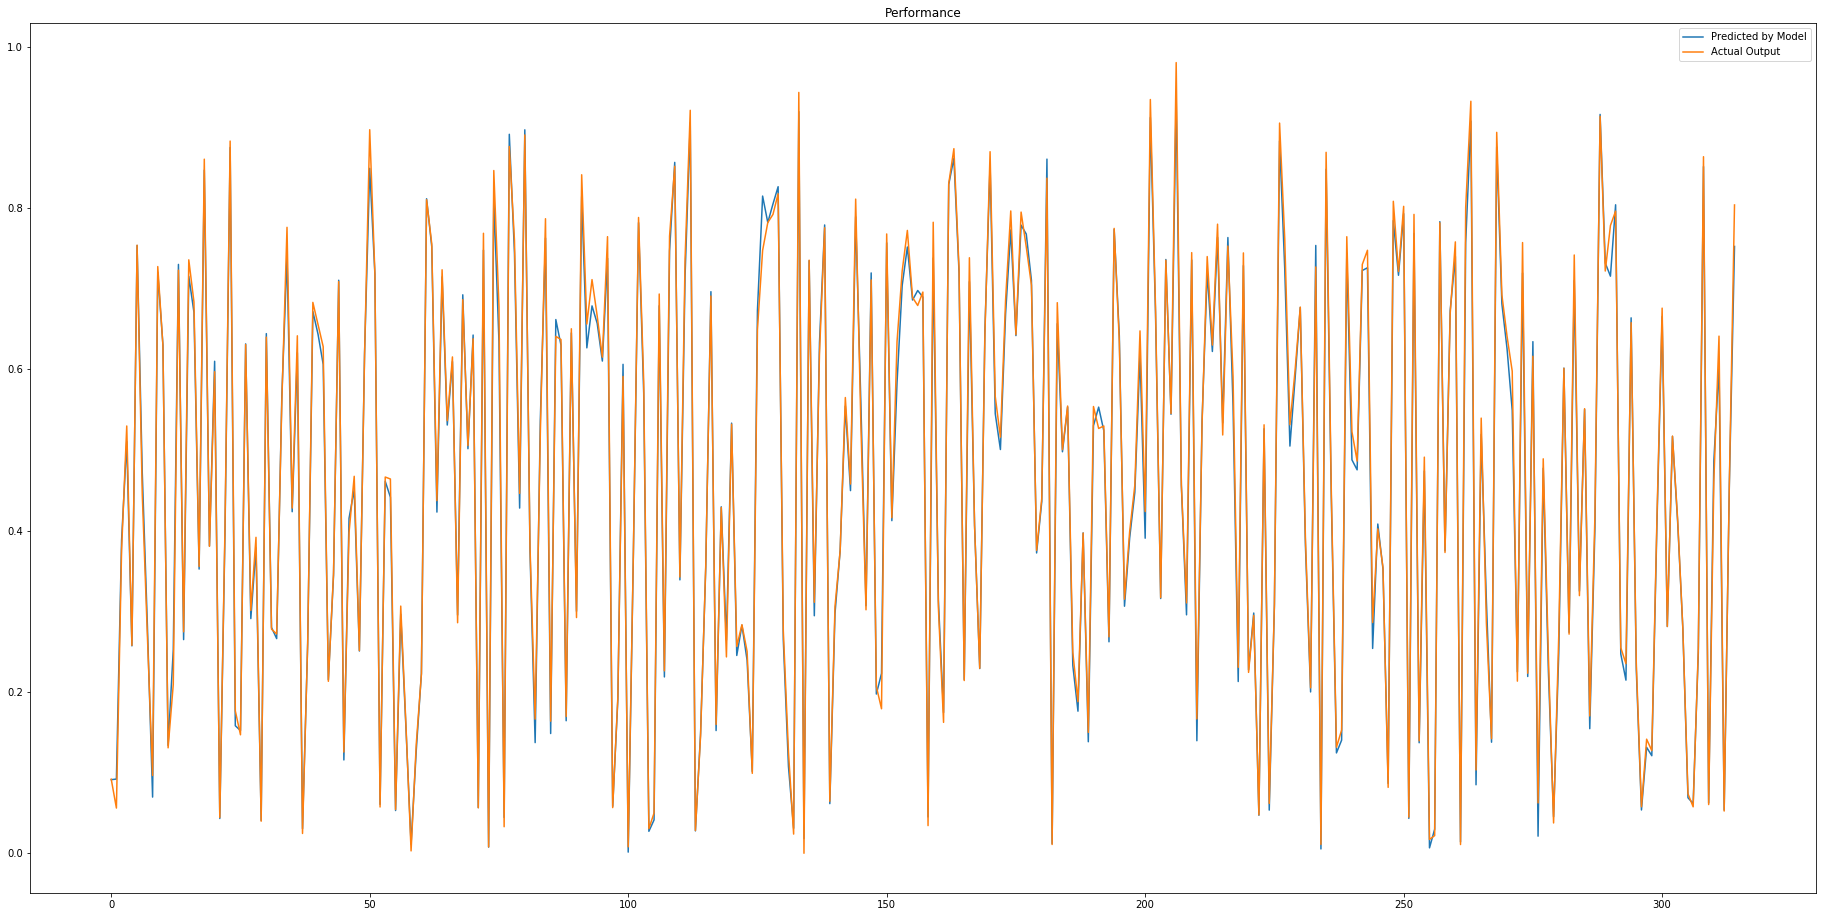

In [54]:
plt.figure(1, figsize= (32,16))
plt.plot(predict)
plt.plot(y_test)

plt.legend(['Predicted by Model','Actual Output'])
plt.title('Performance')

plt.show()

In [58]:
original_value = scaler1.inverse_transform(y_test)

In [59]:
len(original_value)

315

In [60]:
original_value = original_value.reshape(315,)

In [62]:
ov = pd.Series(original_value)

In [64]:
predicted_value = scaler1.inverse_transform(predict)

In [65]:
len(predicted_value)

315

In [66]:
predicted_value = predicted_value.reshape(315,)

In [67]:
pv = pd.Series(predicted_value)

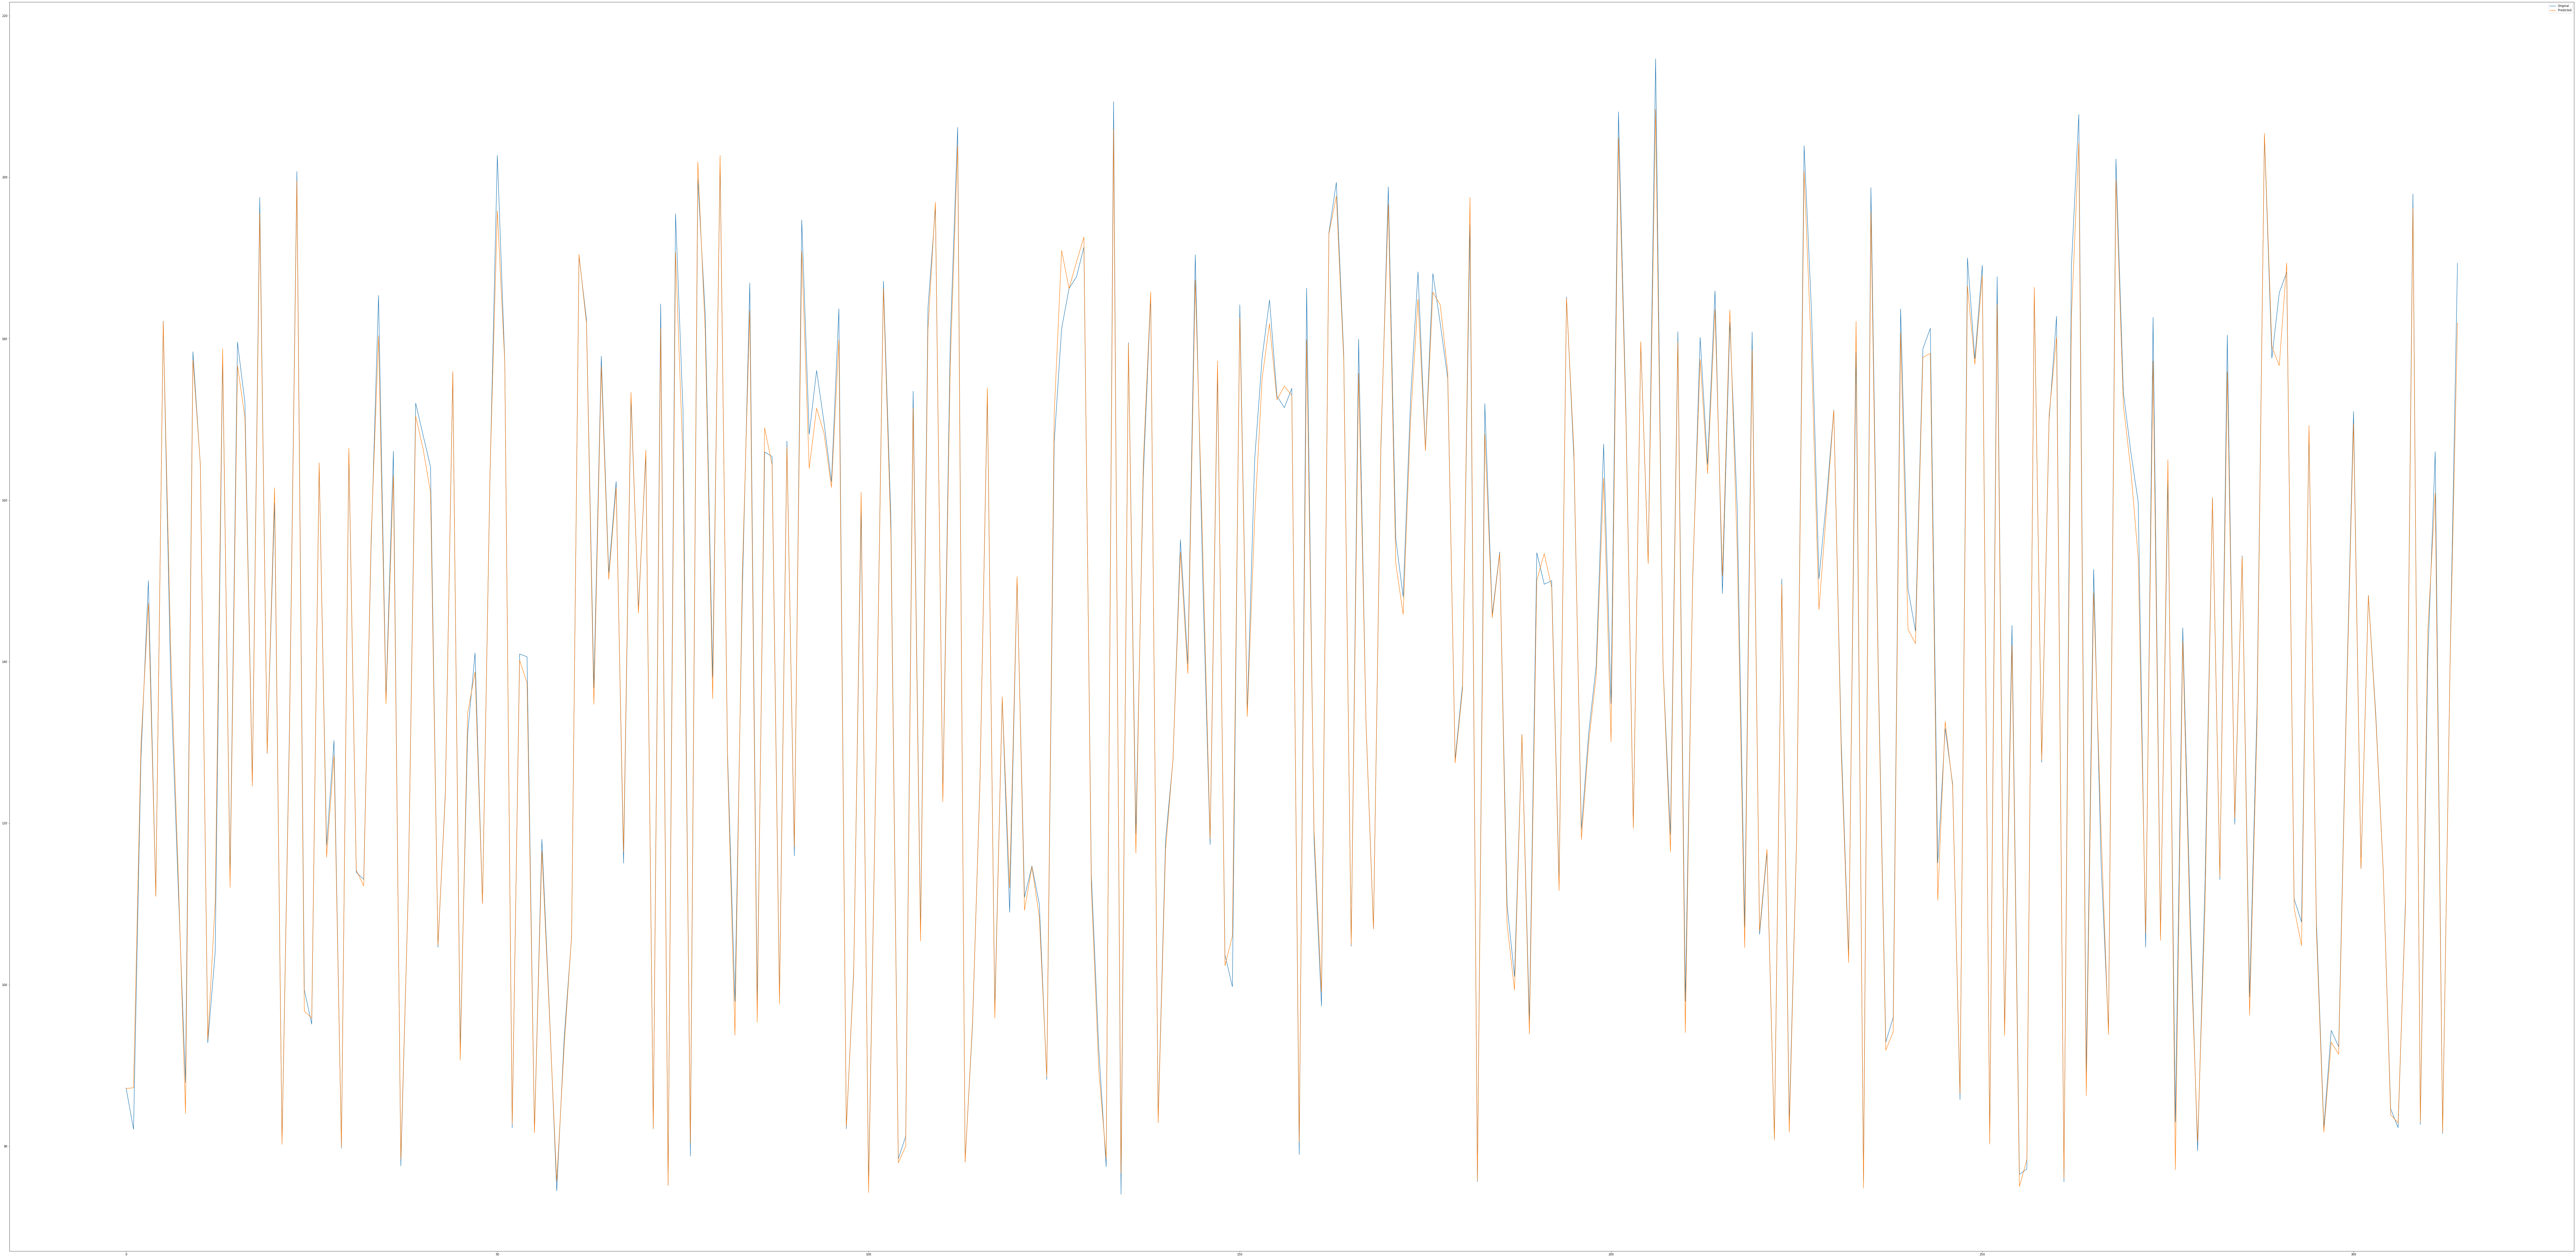

In [71]:
plt.figure(2, figsize = (160,80))
plt.plot(original_value)
plt.plot(predicted_value)

plt.legend(['Original', 'Predicted'])
plt.show()

In [109]:
result = pd.DataFrame({'Original Value':ov, 'Predicted Value': pv})

In [79]:
df

High     Low  close_next_day
Date                                      
2014-12-31   79.80   77.86           78.45
2015-01-02   78.93   77.70           77.19
2015-01-05   79.25   76.86           76.15
2015-01-06   77.59   75.36           76.15
2015-01-07   77.36   75.82           78.18
2015-01-08   78.23   76.08           77.74
2015-01-09   78.62   77.20           76.72
2015-01-12   78.00   76.21           76.45
2015-01-13   78.08   75.85           76.28
2015-01-14   77.20   76.03           74.05
2015-01-15   76.57   73.54           75.18
2015-01-16   75.32   73.84           76.24
2015-01-20   76.31   74.82           76.74
2015-01-21   77.30   75.85           77.65
2015-01-22   77.75   76.68           77.83
2015-01-23   78.19   77.04           77.50
2015-01-26   78.47   77.29           75.78
2015-01-27   76.88   75.63           76.24
2015-01-28   77.64   76.00           78.00
2015-01-29   78.02   74.21           75.91
2015-01-30   78.16   75.75           74.99
2015-02-02   76.14   73.75           75.40
2015-02-03   75.58   73.86           75.63
2015-02-04   76.35   75.01           75.61
2015-02-05   75.98   75.21           74.47
2015-02-06   75.70   74.25           74.44
2015-02-09   74.83   73.45           75.19
2015-02-10   75.34   74.50           76.51
2015-02-11   76.75   75.03           76.23
2015-02-12   76.87   75.89           75.74
...            ...     ...             ...
2019-11-18  198.63  193.05          199.32
2019-11-19  200.00  196.86          197.51
2019-11-20  199.59  195.43          197.93
2019-11-21  199.09  196.86          198.82
2019-11-22  199.30  197.62          199.79
2019-11-25  200.97  199.25          198.97
2019-11-26  200.15  198.04          202.00
2019-11-27  203.14  199.42          201.64
2019-11-29  203.80  201.21          199.70
2019-12-02  202.18  198.05          198.82
2019-12-03  198.93  195.08          198.71
2019-12-04  200.03  198.05          199.36
2019-12-05  201.29  198.21          201.05
2019-12-06  201.57  200.06          201.34
2019-12-09  203.14  200.21          200.87
2019-12-10  202.05  200.15          202.26
2019-12-11  202.63  200.28          196.75
2019-12-12  203.66  194.10          194.11
2019-12-13  196.80  193.17          197.92
2019-12-16  199.12  194.81          198.39
2019-12-17  199.00  196.13          202.50
2019-12-18  204.30  200.09          206.06
2019-12-19  206.30  202.51          206.30
2019-12-20  207.71  203.43          206.18
2019-12-23  208.59  205.68          205.12
2019-12-24  206.79  205.00          207.79
2019-12-26  207.82  205.31          208.10
2019-12-27  208.93  206.59          204.41
2019-12-30  207.90  203.90          205.25
2019-12-31  205.56  203.60             NaN

[1259 rows x 3 columns]

In [80]:
googl = yf.download('GOOGL', '2015-01-01','2020-01-01')

[*********************100%***********************]  1 of 1 downloaded


In [81]:
googl['close_next_day'] = googl['Close'].shift(-1)

In [83]:
high = googl['High'].to_numpy()
low = googl['Low'].to_numpy()
y = googl['close_next_day'].to_numpy()

In [84]:
high = np.delete(high,-1)
low = np.delete(low,-1)
y = np.delete(y,-1)

In [85]:
x = np.vstack((high,low)).T

In [88]:
x.shape

(1258, 2)

In [89]:
y = y.reshape(1258,1)

In [91]:
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

In [95]:
scaler1 = MinMaxScaler()
scaler1.fit(y)
y = scaler1.transform(y)

In [96]:
x = x.reshape(1258,1,2)

In [97]:
y.shape

(1258, 1)

In [98]:
predict = model.predict(x)

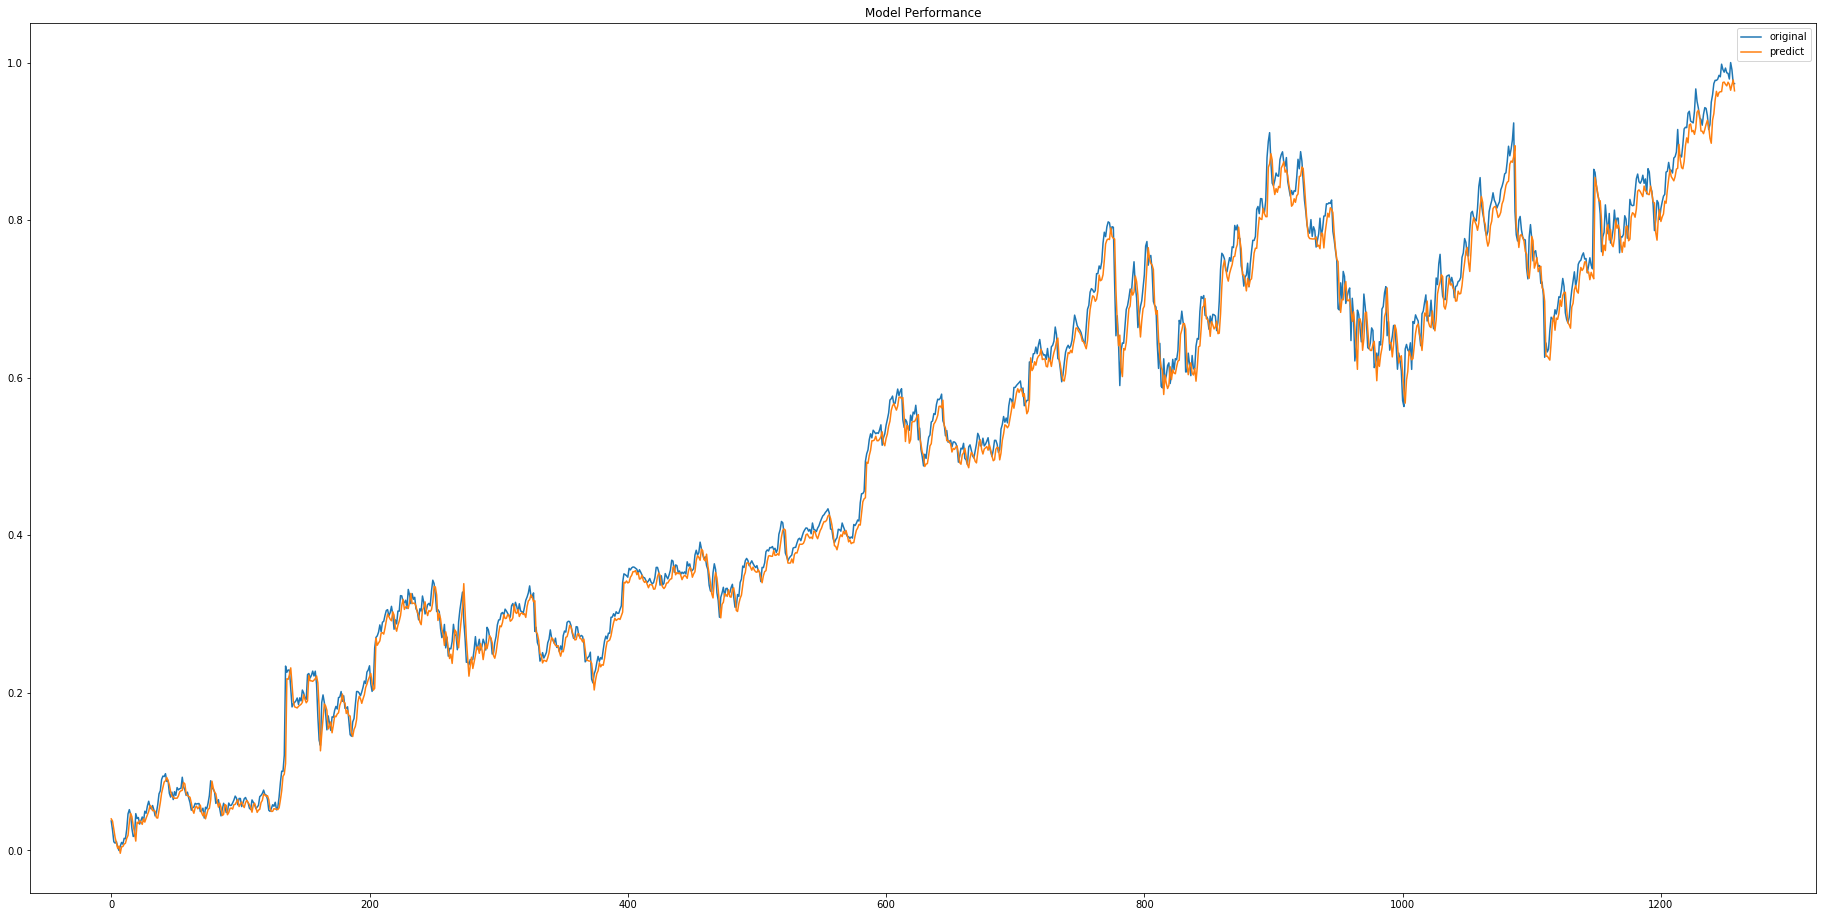

In [100]:
plt.figure(3, figsize=(32,16))
plt.plot(y)
plt.plot(predict)

plt.legend(['original','predict'])
plt.title('Model Performance')

plt.show()

In [102]:
result.head()

Original Value  Predicted Value
0           87.22        87.141029
1           82.09        87.244385
2          127.96       129.725601
3          150.04       147.267410
4          111.02       110.935799

In [112]:
result['error'] = result['Original Value'] - result['Predicted Value']

In [113]:
result.head()

Original Value  Predicted Value     error
0           87.22        87.141029  0.078971
1           82.09        87.244385 -5.154385
2          127.96       129.725601 -1.765601
3          150.04       147.267410  2.772590
4          111.02       110.935799  0.084201

In [114]:
result.describe()

Original Value  Predicted Value       error
count      315.000000       315.000000  315.000000
mean       141.428349       140.533646    0.894705
std         38.564486        38.058308    2.290798
min         74.050000        74.252502   -9.669901
25%        108.990000       107.920425   -0.274538
50%        144.500000       143.793793    0.710872
75%        176.635000       175.931900    2.216836
max        214.670000       208.394913    9.008848